In [5]:
#pip install opencv-python
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import random
from glob import glob
from keras import preprocessing
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import Adam

%matplotlib inline

Using TensorFlow backend.


In [ ]:
np.array([
    [[255, 0, 0] , [0, 255, 0]],
    [[0, 0, 255] , [127, 127, 127]],
])

In [ ]:
x = np.array([
    [[255, 0, 0] , [0, 255, 0]],
    [[0, 0, 255] , [127, 127, 127]],
])

In [ ]:
x[1,1]

In [ ]:
plt.imshow(np.array([
    [[255, 0, 0] , [0, 255, 0]],
    [[0, 0, 255] , [127, 127, 127]],
]))

In [ ]:
# read image
image = cv2.imread("yoda-baby.jpeg")

In [ ]:
image.shape

In [ ]:
type(image)

In [ ]:
image[1,1]

In [ ]:
plt.imshow(image)

In [ ]:
# parse BRG to RGB
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# show image
plt.imshow(image)

In [ ]:
# get the reference to the webcam
CAMERA = cv2.VideoCapture(0)

while(True):
    # read a new frame
    _, frame = CAMERA.read()

    # show the frame
    cv2.imshow("Capturing frames", frame)

    # quit camera if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

CAMERA.release()
cv2.destroyAllWindows()

In [ ]:
# get the reference to the webcam
CAMERA = cv2.VideoCapture(0)
HEIGHT = 500

while(True):
    # read a new frame
    _, frame = CAMERA.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * HEIGHT) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, HEIGHT))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    # quit camera if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

CAMERA.release()
cv2.destroyAllWindows()

In [ ]:
# get the reference to the webcam
CAMERA = cv2.VideoCapture(0)
HEIGHT = 500
RAW_FRAMES = []

while(True):
    # read a new frame
    _, frame = CAMERA.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * HEIGHT) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, HEIGHT))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("s"):
        # save the frame
        RAW_FRAMES.append(frame)
        
        # preview the frame
        plt.imshow(frame)
        plt.show()

CAMERA.release()
cv2.destroyAllWindows()

In [ ]:
# show raw frames
for frame in RAW_FRAMES:
    plt.imshow(frame)
    plt.show()

In [ ]:
IMAGES = []

for frame in RAW_FRAMES:
    # get ROI
    roi = frame[75+1:425-1, 300+1:650-1]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    IMAGES.append(roi)
    
    plt.imshow(roi)
    plt.show()

In [ ]:
camera = cv2.VideoCapture(0)
camera_height = 500
raw_frames_type_1 = []
raw_frames_type_2 = []

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frame
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (0, 255, 0), 2)

    # show the frame
    cv2.imshow("Capturing frames", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break
    elif key & 0xFF == ord("1"):
        # save the frame
        raw_frames_type_1.append(frame)
        print('1 key pressed - saved TYPE_1 frame')
        
    elif key & 0xFF == ord("2"):
        # save the frame
        raw_frames_type_2.append(frame)
        print('2 key pressed - Saved TYPE_2 frame')

camera.release()
cv2.destroyAllWindows()

In [ ]:
for i, frame in enumerate(raw_frames_type_1):
    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize to 224*224
    roi = cv2.resize(roi, (224, 224))
    
    # persist the image
    cv2.imwrite('./data/images_type_1/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

for i, frame in enumerate(raw_frames_type_2):
    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize to 224*224
    roi = cv2.resize(roi, (224, 224))
    
    # persist the image
    cv2.imwrite('./data/images_type_2/{}.png'.format(i), cv2.cvtColor(roi,cv2.COLOR_BGR2RGB))

In [1]:
class_names = ['FONE DE OUVIDO', 'GARRAFA TÉRMICA', ]

In [2]:
width = 96
height = 96

In [3]:
def load_images(base_path):
    images = []
    path = os.path.join(base_path, '*.png')
    for image_path in glob(path):
        image = preprocessing.image.load_img(image_path,
                                             target_size=(width, height))
        x = preprocessing.image.img_to_array(image)

        images.append(x)
    return images

In [6]:
images_type_1 = load_images('./data/images_type_1')
images_type_2 = load_images('./data/images_type_2')

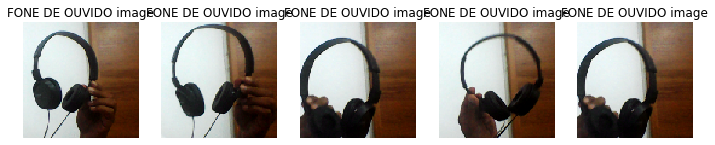

In [7]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_1))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[0]))

# show the plot
plt.show()

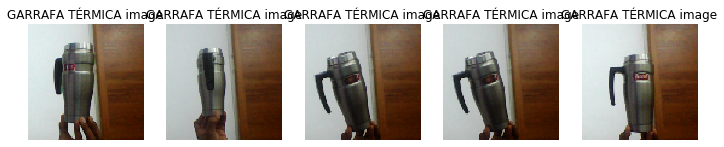

In [8]:
plt.figure(figsize=(12,8))

for i in range(5):
    plt.subplot(1, 5, i+1)
    image = preprocessing.image.array_to_img(random.choice(images_type_2))
    plt.imshow(image)
    
    plt.axis('off')
    plt.title('{} image'.format(class_names[1]))

# show the plot
plt.show()

In [9]:
X_type_1 = np.array(images_type_1)
X_type_2 = np.array(images_type_2)

print(X_type_1.shape)
print(X_type_2.shape)

(11, 96, 96, 3)
(10, 96, 96, 3)


In [10]:
X = np.concatenate((X_type_1, X_type_2), axis=0)

In [11]:
X

array([[[[176., 183., 182.],
         [175., 182., 182.],
         [173., 182., 183.],
         ...,
         [ 90.,  66.,  49.],
         [ 88.,  63.,  46.],
         [ 84.,  58.,  52.]],

        [[176., 185., 183.],
         [175., 183., 182.],
         [175., 183., 182.],
         ...,
         [ 88.,  66.,  49.],
         [ 87.,  65.,  49.],
         [ 85.,  62.,  55.]],

        [[177., 182., 184.],
         [177., 182., 184.],
         [175., 182., 183.],
         ...,
         [ 89.,  69.,  51.],
         [ 87.,  64.,  53.],
         [ 87.,  64.,  54.]],

        ...,

        [[158., 163., 162.],
         [157., 163., 162.],
         [156., 163., 162.],
         ...,
         [ 47.,  15.,   0.],
         [ 45.,  16.,   0.],
         [ 44.,  19.,   0.]],

        [[158., 163., 160.],
         [158., 163., 162.],
         [158., 162., 162.],
         ...,
         [ 37.,  11.,   0.],
         [ 34.,  13.,   0.],
         [ 37.,  12.,   0.]],

        [[157., 162., 161.],
       

In [12]:
X = X / 255.

X.shape

(21, 96, 96, 3)

In [13]:
y_type_1 = [0 for item in enumerate(X_type_1)]
y_type_2 = [1 for item in enumerate(X_type_2)]

y = np.concatenate((y_type_1, y_type_2), axis=0)

y = to_categorical(y, num_classes=len(class_names))

print(y.shape)

(21, 2)


In [14]:
# default parameters
conv_1 = 16
conv_1_drop = 0.2
conv_2 = 32
conv_2_drop = 0.2
dense_1_n = 1024
dense_1_drop = 0.2
dense_2_n = 512
dense_2_drop = 0.2
lr = 0.001

epochs = 30
batch_size = 32
color_channels = 3

def build_model(conv_1_drop=conv_1_drop, conv_2_drop=conv_2_drop,
                dense_1_n=dense_1_n, dense_1_drop=dense_1_drop,
                dense_2_n=dense_2_n, dense_2_drop=dense_2_drop,
                lr=lr):
    
    model = Sequential()

    model.add(Convolution2D(conv_1, (3, 3),
                            input_shape=(width, height, color_channels),
                            activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_1_drop))

    model.add(Convolution2D(conv_2, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(conv_2_drop))
        
    model.add(Flatten())
        
    model.add(Dense(dense_1_n, activation='relu'))
    model.add(Dropout(dense_1_drop))

    model.add(Dense(dense_2_n, activation='relu'))
    model.add(Dropout(dense_2_drop))

    model.add(Dense(len(class_names), activation='softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer=Adam(lr=lr),
                  metrics=['accuracy'])

    return model

In [15]:
# model with base parameters
model = build_model()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 94, 94, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 47, 47, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 47, 47, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 22, 22, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [16]:
epochs = 20
model.fit(X, y, epochs=epochs)

Epoch 1/20
21/21 [==============================] - 1s 26ms/step - loss: 0.7109 - accuracy: 0.4762
Epoch 2/20
21/21 [==============================] - 0s 17ms/step - loss: 0.8161 - accuracy: 0.4286
Epoch 3/20
21/21 [==============================] - 0s 17ms/step - loss: 1.5210 - accuracy: 0.5238
Epoch 4/20
21/21 [==============================] - 0s 17ms/step - loss: 5.7170 - accuracy: 0.4762
Epoch 5/20
21/21 [==============================] - 0s 21ms/step - loss: 2.6947 - accuracy: 0.4762
Epoch 6/20
21/21 [==============================] - 0s 18ms/step - loss: 0.2767 - accuracy: 0.9048
Epoch 7/20
21/21 [==============================] - 0s 17ms/step - loss: 1.5144 - accuracy: 0.5238
Epoch 8/20
21/21 [==============================] - 0s 18ms/step - loss: 1.3949 - accuracy: 0.5238
Epoch 9/20
21/21 [==============================] - 0s 20ms/step - loss: 0.6323 - accuracy: 0.5714
Epoch 10/20
21/21 [==============================] - 0s 17ms/step - loss: 0.3367 - accuracy: 0.9524
Epoch 11/

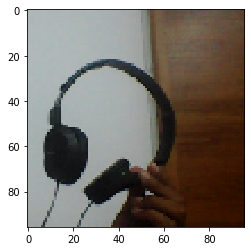

The type predicted is: FONE DE OUVIDO


In [17]:
type_1 = preprocessing.image.load_img('./data/images_type_1/0.png',
                                      target_size=(width, height))
plt.imshow(type_1)
plt.show()

type_1_X = np.expand_dims(type_1, axis=0)

predictions = model.predict(type_1_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

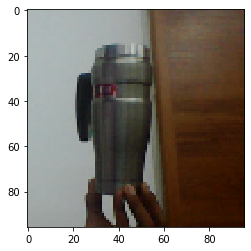

The type predicted is: GARRAFA TÉRMICA


In [18]:
type_2 = preprocessing.image.load_img('./data/images_type_2/8.png',
                                      target_size=(width, height))
plt.imshow(type_2)
plt.show()

type_2_X = np.expand_dims(type_2, axis=0)

predictions = model.predict(type_2_X)

print('The type predicted is: {}'.format(class_names[np.argmax(predictions)]))

In [21]:
import time 

# get the reference to the webcam
camera = cv2.VideoCapture(0)
camera_height = 500

while(True):
    # read a new frame
    _, frame = camera.read()
    
    # flip the frameq
    frame = cv2.flip(frame, 1)

    # rescaling camera output
    aspect = frame.shape[1] / float(frame.shape[0])
    res = int(aspect * camera_height) # landscape orientation - wide image
    frame = cv2.resize(frame, (res, camera_height))

    # add rectangle
    cv2.rectangle(frame, (300, 75), (650, 425), (240, 100, 0), 2)

    # get ROI
    roi = frame[75+2:425-2, 300+2:650-2]
    
    # parse BRG to RGB
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)

    # resize
    roi = cv2.resize(roi, (width, height))
    
    # predict!
    roi_X = np.expand_dims(roi, axis=0)

    predictions = model.predict(roi_X)
    type_1_pred, type_2_pred = predictions[0]

    # add text
    type_1_text = '{}: {}%'.format(class_names[0], int(type_1_pred*100))
    cv2.putText(frame, type_1_text, (70, 170), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)

    # add text
    tipe_2_text = '{}: {}%'.format(class_names[1], int(type_2_pred*100))
    cv2.putText(frame, tipe_2_text, (70, 200), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (240, 240, 240), 2)


    # show the frame
    cv2.imshow("Test out", frame)

    key = cv2.waitKey(1)

    # quit camera if 'q' key is pressed
    if key & 0xFF == ord("q"):
        break

camera.release()
cv2.destroyAllWindows()